
Vista corta de los datos
   c  B  S
0  0  0  0
1  0  1  0
2  1  0  0
3  1  1  1
Datos= 
[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]
[2, 2, 1]
Entrada 1: [0 0], Salida: [[4.53978687e-05]]
Entrada 2: [0 1], Salida: [[4.54803785e-05]]
Entrada 3: [1 0], Salida: [[4.54803785e-05]]
Entrada 4: [1 1], Salida: [[1.]]


C:\Users\gi25\AppData\Local\Temp\ipykernel_18616\2415824894.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas[0, a] = self.neuronas[a].sigmoide(X)
C:\Users\gi25\AppData\Local\Temp\ipykernel_18616\2415824894.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas[0, a] = self.neuronas[a].sigmoide(X)


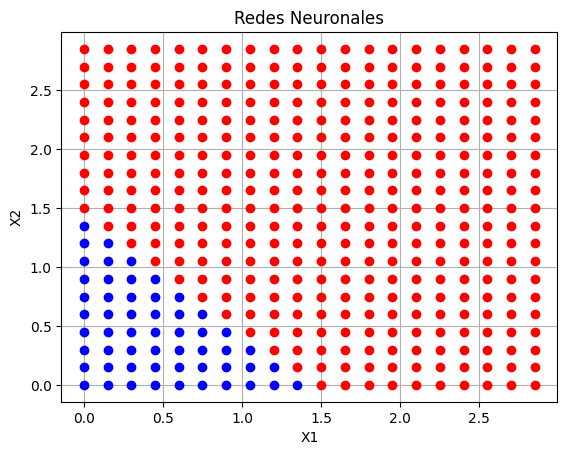

Predicciones guardadas en 'Salida':


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Neurona:
    def __init__(self, N):
        self.b = 1
        self.w = np.zeros([N, 1])
        for a in range(N):
            self.w[a, 0] = np.random.randn() * 0.1

    def sigmoide(self, X):
        return 1 / (1 + np.exp(-(np.dot(X, self.w) + self.b)))

    def __str__(self):
        return f"b= {self.b}, \nw= \n{self.w}"


class Capa:
    def __init__(self, neuronas, entradas):
        self.neuronas = [Neurona(entradas) for _ in range(neuronas)]

    def forwardPropagation(self, X):
        salidas = np.zeros([1, len(self.neuronas)])
        for a in range(len(self.neuronas)):
            salidas[0, a] = self.neuronas[a].sigmoide(X)
        return salidas

    def backPropagation(self, error):
        a = 1


class RedNeuronal:
    def __init__(self, capas):
        self.capas = [Capa(capas[i], capas[i-1]) for i in range(1, len(capas))]

    def forwardPropagation(self, X):
        for a in range(len(self.capas)):
            X = self.capas[a].forwardPropagation(X)
        return X

    def prediccion(self, X):
        m = X.shape[0]
        Y = np.zeros([m, 1])
        for a in range(m):
            Y[a] = self.forwardPropagation(X[a, :])
        return Y

    def getCosto(self, X, Y):
        costo = 0
        m = len(Y)
        for a in range(m):
            yp = self.forwardPropagation(X[a, :])
            loss = -(Y[a] * np.log(yp) + (1 - Y[a]) * np.log(1 - yp))
            costo += loss
        costo /= m
        return costo

    def backPropagation(self, X, Y):
        pass

    def __str__(self):
        cadena = "Red Neuronal que tiene " + str(len(self.capas[0].neuronas[0].w)) + " entradas y " + str(
            len(self.capas)) + " capas\n"
        i = 1
        for a in self.capas:
            cadena += "Capa " + str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena
        
def cargar_pesos_desde_archivo(archivo):
    with open(archivo, 'r') as file:
        lineas = file.readlines()

    dimensiones_red = list(map(int, lineas[0].split()))
    capas = dimensiones_red
    red_neuronal = RedNeuronal(capas)
    print(capas)

    inicio_linea_pesos = 1
    for capa in red_neuronal.capas:
        for neurona in capa.neuronas:
            # Verificar si hay suficientes valores en la línea
            if not lineas[inicio_linea_pesos].split():
                print("La línea de pesos está vacía.")
                return None  # Otra opción podría ser lanzar una excepción

            valores = list(map(float, lineas[inicio_linea_pesos].split()))
            neurona.b = valores[0]
            neurona.w[0, 0] = valores[1]
            neurona.w[1, 0] = valores[2]
            inicio_linea_pesos += 1

    return red_neuronal

#Entrada
datos = pd.read_csv('data/and.csv', sep=',')
print("\nVista corta de los datos")
print(datos.head())
datos = datos.to_numpy()
print(f"Datos= \n{datos}")
N = datos.shape[1] - 1
X = datos[:, 0:N]
Y = datos[:, N]

# Cargar datos desde un archivo
archivo_pesos = 'datosred.txt'
red_desde_archivo = cargar_pesos_desde_archivo(archivo_pesos)

resultados = []

for i in range(datos.shape[0]):
    entrada = X[i, :]
    salida = red_desde_archivo.forwardPropagation(entrada)
    print(f"Entrada {i + 1}: {entrada}, Salida: {salida}")
    resultados.append(salida)

# Convertir la lista de resultados a un arreglo bidimensional
resultados_array = np.vstack(resultados)

# Guardar las salidas en un archivo
np.savetxt('Salida.txt', resultados_array, delimiter=',', fmt='%.6f')

datos_prueba = pd.read_csv('data/datosPrueba.csv', sep=',')
datos_prueba = datos_prueba.to_numpy()
N = datos_prueba.shape[1] - 1
m = datos_prueba.shape[0]
X_prueba = datos_prueba[:, 0:N]
Y_prediccion = red_desde_archivo.prediccion(X_prueba)

X0 = [j for j in range(m) if Y_prediccion[j] < 0.5]
X1 = [j for j in range(m) if Y_prediccion[j] >= 0.5]

plt.plot(X_prueba[X0, 0], X_prueba[X0, 1], "bo")
plt.plot(X_prueba[X1, 0], X_prueba[X1, 1], "ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Redes Neuronales")
plt.show()

# Visualizar las predicciones
print("Predicciones guardadas en 'Salida':")